## DFO Nutrient Comparison

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import pickle

mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
mpl.rc('legend', fontsize=10)
mpl.rc('axes', titlesize=10)
mpl.rc('axes', labelsize=10)
mpl.rc('figure', titlesize=10)
mpl.rc('font', size=10)
%matplotlib inline

In [2]:
PATH= '/data/eolson/results/MEOPAR/SS36runs/linkHC201812/'
#PATH= '/results2/SalishSea/hindcast/'
start_date = dt.datetime(2015,1,1)
end_date = dt.datetime(2018,1,1)
flen=1
namfmt='nowcast'
#varmap={'N':'nitrate','Si':'silicon','Ammonium':'ammonium'}
filemap={'nitrate':'ptrc_T','silicon':'ptrc_T','ammonium':'ptrc_T','diatoms':'ptrc_T','ciliates':'ptrc_T','flagellates':'ptrc_T','vosaline':'grid_T','votemper':'grid_T'}
#gridmap={'nitrate':'tmask','silicon':'tmask','ammonium':'tmask'}
fdict={'ptrc_T':1,'grid_T':1}
df1=et.loadDFO(datelims=(start_date,end_date))
df1.head()

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,Chlorophyll_Extracted,Chlorophyll_Extracted_units,N,Si,Silicate_units,AbsSal,ConsT,Z,dtUTC
0,2015.0,2.0,11.0,11.068611,48.300833,-124.000333,1.9,NaN,None,None,NaN,mg/m^3,15.31,32.14,umol/L,29.227507,9.859421,1.883998,2015-02-11 11:04:07
1,2015.0,2.0,11.0,11.068611,48.300833,-124.000333,6.6,NaN,None,None,2.57,mg/m^3,17.13,33.90,umol/L,29.484341,9.777243,6.544340,2015-02-11 11:04:07
2,2015.0,2.0,11.0,11.068611,48.300833,-124.000333,6.7,NaN,None,None,NaN,mg/m^3,NaN,NaN,umol/L,29.484839,9.771987,6.643495,2015-02-11 11:04:07
3,2015.0,2.0,11.0,11.068611,48.300833,-124.000333,11.0,NaN,None,None,NaN,mg/m^3,NaN,NaN,umol/L,30.144549,9.439995,10.907117,2015-02-11 11:04:07
4,2015.0,2.0,11.0,11.068611,48.300833,-124.000333,11.0,NaN,None,None,NaN,mg/m^3,20.62,37.65,umol/L,30.157913,9.433733,10.907117,2015-02-11 11:04:07


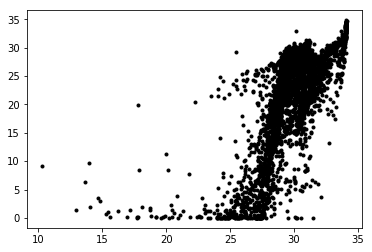

In [3]:
plt.plot(df1['AbsSal'],df1['N'],'k.')

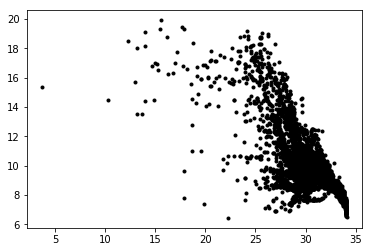

In [4]:
plt.plot(df1['AbsSal'],df1['ConsT'],'k.')

In [5]:
df1.loc[(~np.isnan(df1.AbsSal)),['AbsSal']].count()

AbsSal    4407
dtype: int64

In [6]:
df1.loc[(~np.isnan(df1.AbsSal))&(np.isnan(df1.N)),['AbsSal']].count()

AbsSal    448
dtype: int64

In [7]:
df1.loc[(np.isnan(df1.AbsSal))&(~np.isnan(df1.N)),['N']].count()

N    1
dtype: int64

In [8]:
df1.loc[df1.ConsT==df1.ConsT,['ConsT']].count()

ConsT    4407
dtype: int64

In [9]:
df1.loc[(~np.isnan(df1.ConsT))&(np.isnan(df1.N)),['ConsT']].count()

ConsT    448
dtype: int64

In [10]:
df1.loc[(np.isnan(df1.ConsT))&(~np.isnan(df1.N)),['N']].count()

N    1
dtype: int64

In [11]:
df1.loc[(~np.isnan(df1.N)),['N']].count()

N    3960
dtype: int64

In [12]:
print('% of N values without S:')
print(df1.loc[(np.isnan(df1.AbsSal))&(~np.isnan(df1.N)),['N']].count().values/df1.loc[(~np.isnan(df1.N)),['N']].count().values*100)

% of N values without S:
[0.02525253]


In [13]:
print('S without N as % of N:')
print(df1.loc[(~np.isnan(df1.AbsSal))&(np.isnan(df1.N)),['AbsSal']].count().values/df1.loc[(~np.isnan(df1.N)),['N']].count().values*100)

S without N as % of N:
[11.31313131]


In [14]:
# use only matched locs. 
df2=df1.loc[(df1.N>=0)|(df1.Si>=0)]

In [15]:
len(df2)

3960

In [16]:
dataDFOPhys=et.matchData(df2,filemap, fdict, start_date, end_date, namfmt, PATH, flen)
dataDFO=dataDFOPhys

/data/eolson/results/MEOPAR/SS36runs/linkHC201812/
(Lat,Lon)= 50.4882 -126.3484  not matched to domain
(Lat,Lon)= 50.6318 -126.4979  not matched to domain
(Lat,Lon)= 50.8046 -126.5291  not matched to domain
(Lat,Lon)= 50.8762 -126.6183  not matched to domain
(Lat,Lon)= 50.9086 -126.5451  not matched to domain
file does not exist:  /data/eolson/results/MEOPAR/SS36runs/linkHC201812/20nov16/SalishSea_1h_20161120_20161120_ptrc_T.nc


KeyboardInterrupt: 

In [17]:
len(dataDFOPhys)

3955

In [18]:
pickle.dump(dataDFOPhys,open('/data/eolson/MEOPAR/SS36runs/calcFiles/evalMatches/dataDFOPhys.pkl','wb'))

In [19]:
cm1=plt.get_cmap('PuBuGn')

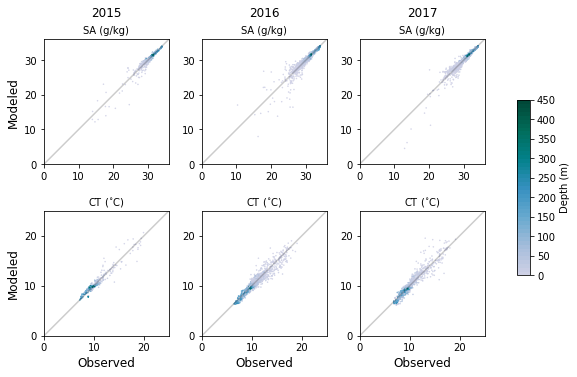

In [20]:
fig = plt.figure(figsize = (7.5,4.5))
gs1=gridspec.GridSpec(2,4,left=.08,right=.98,bottom=.015,top=.94,
                      wspace=.34,hspace=.34,height_ratios=[1,1],width_ratios=[1,1,1,.1])
ax2015N=fig.add_subplot(gs1[0,0])
ax2016N = fig.add_subplot(gs1[0,1])
ax2017N = fig.add_subplot(gs1[0,2])
ax2015Si= fig.add_subplot(gs1[1,0])
ax2016Si= fig.add_subplot(gs1[1,1])
ax2017Si= fig.add_subplot(gs1[1,2])
gscb=gridspec.GridSpecFromSubplotSpec(5,1,subplot_spec=gs1[:,3])
axcb = fig.add_subplot(gscb[1:-1])

for ax in (ax2015N,ax2016N,ax2017N):
    ax.plot((0,36),(0,36),'k-',alpha=.2)
for ax in (ax2015Si,ax2016Si,ax2017Si):
    ax.plot((0,25),(0,25),'k-',alpha=.2)

vm0=-150
args={'marker':'.','s':1,}
dataDFO2015=dataDFO.loc[(dataDFO.dtUTC>=dt.datetime(2015,1,1))&(dataDFO.dtUTC<dt.datetime(2016,1,1))]
ps=et.varvarScatter(ax2015N,dataDFO2015,'AbsSal','mod_vosaline','Z',vmin=vm0,vmax=450,cm=cm1,args=args)
dataDFO2016=dataDFO.loc[(dataDFO.dtUTC>=dt.datetime(2016,1,1))&(dataDFO.dtUTC<dt.datetime(2017,1,1))]
ps=et.varvarScatter(ax2016N,dataDFO2016,'AbsSal','mod_vosaline','Z',vmin=vm0,vmax=450,cm=cm1,args=args)
dataDFO2017=dataDFO.loc[(dataDFO.dtUTC>=dt.datetime(2017,1,1))&(dataDFO.dtUTC<dt.datetime(2018,1,1))]
ps=et.varvarScatter(ax2017N,dataDFO2017,'AbsSal','mod_vosaline','Z',vmin=vm0,vmax=450,cm=cm1,args=args)
ps=et.varvarScatter(ax2015Si,dataDFO2015,'ConsT','mod_votemper','Z',vmin=vm0,vmax=450,cm=cm1,args=args)
ps=et.varvarScatter(ax2016Si,dataDFO2016,'ConsT','mod_votemper','Z',vmin=vm0,vmax=450,cm=cm1,args=args)
ps=et.varvarScatter(ax2017Si,dataDFO2017,'ConsT','mod_votemper','Z',vmin=vm0,vmax=450,cm=cm1,args=args)

cb=fig.colorbar(ps,cax=axcb,boundaries=np.linspace(0,450,46))
cb.set_label('Depth (m)')

ntick=np.arange(0,36,10)
ntickl=[str(i) for i in ntick]
for ax in (ax2015N,ax2016N,ax2017N):
    ax.set_xlim((0,36))
    ax.set_ylim((0,36))
    ax.set_xticks(ntick)
    ax.set_xticklabels(ntickl)
    ax.set_yticks(ntick)
    ax.set_yticklabels(ntickl)
    
stick=np.arange(0,25,10)
stickl=[str(i) for i in stick]
for ax in (ax2015Si,ax2016Si,ax2017Si):
    ax.set_xlim((0,25))
    ax.set_ylim((0,25))
    ax.set_xticks(stick)
    ax.set_xticklabels(stickl)
    ax.set_yticks(stick)
    ax.set_yticklabels(stickl)
    
for ax in (ax2015N,ax2016N,ax2017N,ax2015Si,ax2016Si,ax2017Si):
    ax.set_aspect(1, adjustable='box')
    #ax.set_xlabel('Observed')
    
ax2015N.set_ylabel('Modeled',fontsize=12)
ax2015Si.set_ylabel('Modeled',fontsize=12)
ax2015Si.set_ylabel('Modeled',fontsize=12)
ax2015Si.set_xlabel('Observed',fontsize=12)
ax2016Si.set_xlabel('Observed',fontsize=12)
ax2017Si.set_xlabel('Observed',fontsize=12)

ax2015N.annotate('2015',xy=[.5,1.18],xycoords='axes fraction',ha='center',fontsize=12)
ax2016N.annotate('2016',xy=[.5,1.18],xycoords='axes fraction',ha='center',fontsize=12)
ax2017N.annotate('2017',xy=[.5,1.18],xycoords='axes fraction',ha='center',fontsize=12)
ax2015N.set_title('SA (g/kg)')
ax2016N.set_title('SA (g/kg)')
ax2017N.set_title('SA (g/kg)')
ax2015Si.set_title('CT ($^{\circ}$C)')
ax2016Si.set_title('CT ($^{\circ}$C)')
ax2017Si.set_title('CT ($^{\circ}$C)')
